In [53]:
import warnings
warnings.filterwarnings("ignore")

## Implementing Grover's Algorithm (Two-Solution Problem)

In [54]:
n = 3
marked_states = ["101", "110"]

In [55]:
from qiskit.quantum_info import Statevector

psi_0 = Statevector.from_label("000")
psi_0.draw("latex")

<IPython.core.display.Latex object>

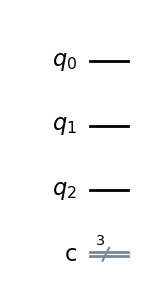

In [56]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q_regs = QuantumRegister(n, name='q')
c_regs = ClassicalRegister(n, name='c')

circuit = QuantumCircuit(q_regs, c_regs)
circuit.draw("mpl")

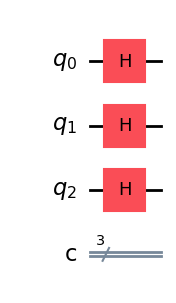

In [57]:
circuit.h(q_regs)
circuit.draw("mpl")

In [58]:
psi_1 = psi_0.evolve(circuit)
psi_1.draw("latex")

<IPython.core.display.Latex object>

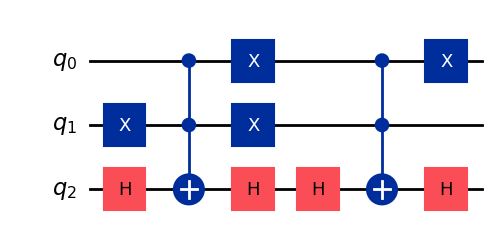

In [59]:
from qiskit import QuantumCircuit

def grover_oracle(n, marked_states):
    qc = QuantumCircuit(n)

    for marked_state in marked_states:
        for i, bit in enumerate(reversed(marked_state)):
            if bit == '0':
                qc.x(i)

        qc.h(n-1)
        qc.mcx(list(range(n-1)), n-1)
        qc.h(n-1)

        for i, bit in enumerate(reversed(marked_state)):
            if bit == '0':
                qc.x(i)

    return qc

grover_oracle(n, marked_states).draw("mpl")

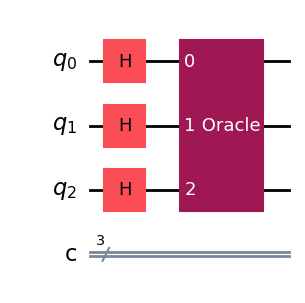

In [60]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(q_regs, c_regs)
circuit.h(q_regs)

circuit.append(grover_oracle(n, marked_states).to_gate(label=' Oracle'), q_regs)
circuit.draw("mpl")

In [61]:
psi_2 = psi_0.evolve(circuit)
psi_2.draw("latex")

<IPython.core.display.Latex object>

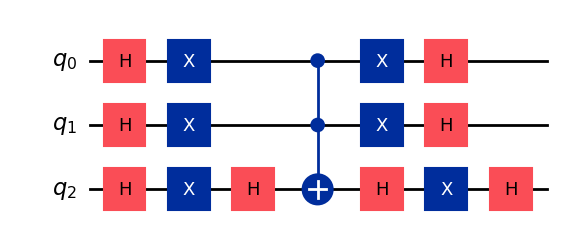

In [62]:
from qiskit.circuit.library import GlobalPhaseGate
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

def diffusion_operator(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

    qc.append(Operator(GlobalPhaseGate(phase=np.pi)))

    return qc

diffusion_operator(n).draw("mpl")

In [63]:
from qiskit.quantum_info import Operator

Operator(diffusion_operator(n).to_gate(label=' Diffusion')).draw("latex")

<IPython.core.display.Latex object>

In [64]:
import numpy as np

num_iterations = int(np.sqrt(((2 ** n) - 1) / len(marked_states)))
num_iterations

1

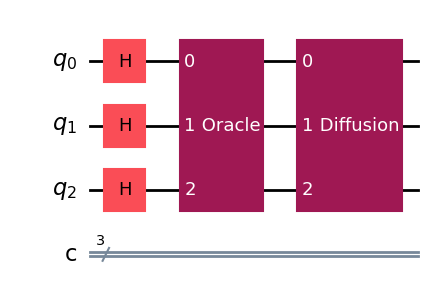

In [65]:
circuit = QuantumCircuit(q_regs, c_regs)
circuit.h(q_regs)

for _ in range(num_iterations):
    circuit.append(grover_oracle(n, marked_states).to_gate(label=' Oracle'), q_regs)
    circuit.append(diffusion_operator(n).to_gate(label=' Diffusion'), q_regs)

circuit.draw("mpl")

In [66]:
psi_2 = psi_0.evolve(circuit)
psi_2.draw("latex")

<IPython.core.display.Latex object>

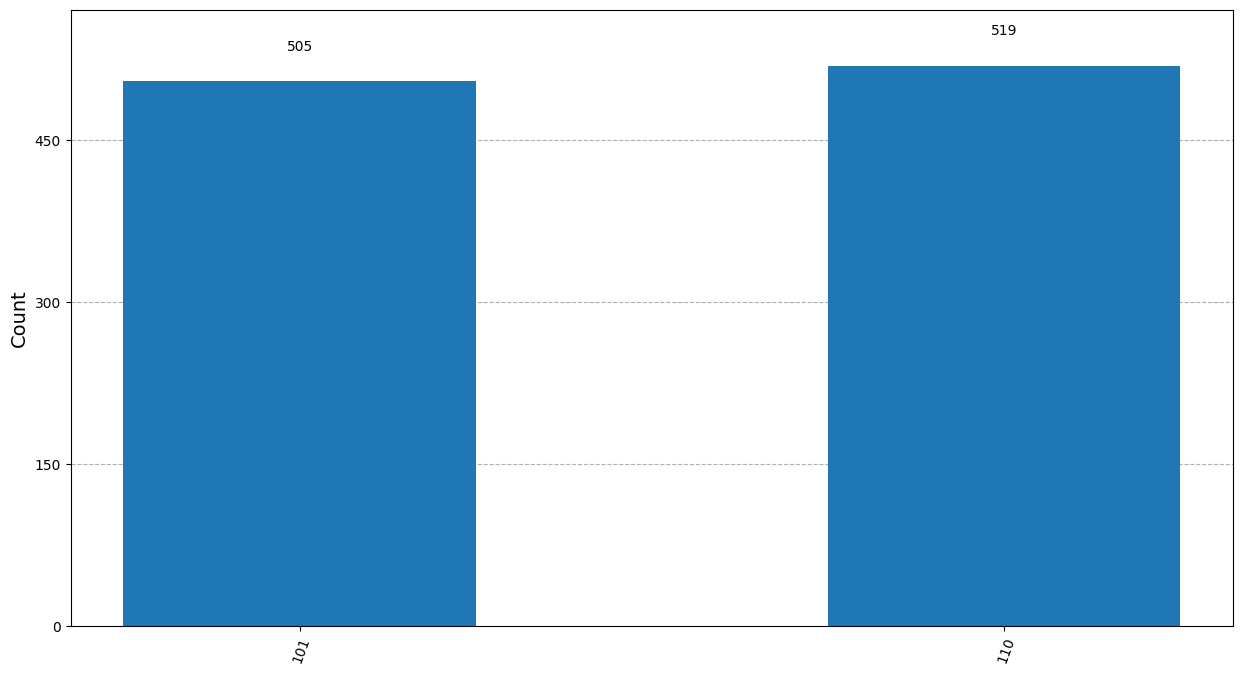

In [67]:
from qiskit import transpile
from qiskit_aer.backends import AerSimulator
from qiskit.visualization import plot_histogram

circuit.measure_all(add_bits=False)
temp_circuit = transpile(circuit)

backend = AerSimulator()
job = backend.run(temp_circuit, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts, figsize=(15, 8))